<a href="https://colab.research.google.com/github/rHarris4080/Capstone1/blob/main/Capstone1_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#14.1 Capstone1 - Robert Harris

The dataset of interest was found on Kaggle. It is the Worldwide Happiness Report where data was provided from 2015-2020. Many categories were included factoring into a country’s overall happiness rank. While many categories overlapped from year to year, many differed on their content and how that content was reported. Therefore, instead of comparing data from year to year I decided to focus on the most recent year provided 2020.  The stakeholder is anyone interested in what people perceive as happiness relative to where in the world you live.  Stakeholders will have a small insight into one aspect of worldwide happiness that could be a segue into further data analysis.

##1. Introduction: Worldwide Happiness Report
We all want to be "Happy" in whatever context we feel happiness lies. Job satisfaction, freedoms and liberty, family, religion, social justice, governmental policies, and freedom to exercise our perceived rights are just a few of the determining factors. Instead of just analyzing the most or least happy countries, I wanted to compare the happier countries with the less happy countries on some category. So, I decided to compare the first quartile(Q1) ranking of 'Freedom to make life choices' with the third quartile(Q3) same ranking for the year 2020.

##2. Hypothesis
Ho: There is no significant difference between the average 'Freedom to make life choices' rankings as measured at the 1st quartile versus that as measured at the 3rd quartile.

Ha: There is a significant difference between the average 'Freedom to make life choices' rankings as measured at the 1st quartile versus that as measured at the 3rd quartile.

##3. Data
The data comes from Kaggle measuring 153 countries where rankings are comprised of 20 variables. The dataset is found through the following link:

https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv

##4.  Methods
For this analysis I will use pandas for comparing World Happiness variables of 'Freedom to make life choices' rankings with the third quartile and first quartile rankings for the year 2020. 

If the distributions of 'Freedom to make life choices' rankings appear to be close to normally distributed based on their histogram, skewness and kurtosis, I wil conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval.



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

#Access the dataset
from google.colab import files 
uploaded = files.upload()
import io  
countries = pd.read_csv(io.BytesIO(uploaded['2020.csv']))

Saving 2020.csv to 2020.csv


Check Skewness & kurtosis - ['Freedom to make life choices']
DescribeResult(nobs=153, minmax=(0.39657300700000003, 0.974998116), mean=0.783360169620915, variance=0.013873600779754575, skewness=-0.6887650422452569, kurtosis=0.1071952310954094)

Visually check normality - ['Freedom to make life choices']


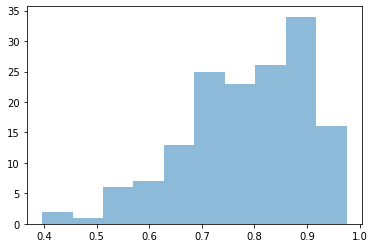


Comparing average differences between Q3 and Q1 'Freedom to make life choices' rankings.
Ttest_indResult(statistic=4.4066108492738145, pvalue=3.4911662875001375e-05)

Comparing average differences between Q4 and Q3 'Freedom to make life choices' rankings.
Ttest_indResult(statistic=3.7434588252232066, pvalue=0.0003563366346132009)

Comparing average differences between Q3 and Q2 'Freedom to make life choices' rankings.
Ttest_indResult(statistic=2.3120748809045604, pvalue=0.02355809686210005)

Comparing average differences between Q2 and Q1 'Freedom to make life choices' rankings.
Ttest_indResult(statistic=2.1555675569926698, pvalue=0.034369315983011337)


In [ ]:
# Investigate the 'Freedom to make life choices' entries for normality
free_choices = countries['Freedom to make life choices']

print("Check Skewness & kurtosis - ['Freedom to make life choices']")
print(stats.describe(free_choices))
print()

print("Visually check normality - ['Freedom to make life choices']")
plt.hist(free_choices , alpha=0.5)
plt.show()
print()

#----------------------------------------------------------------------- Filtering countries by quartiles for comparsions
# Country rank sorted by 'Ladder score' in descending order
countries_top = countries[countries['Ladder score'] > countries['Ladder score'].median()]
countries_q4 = countries_top[countries_top['Ladder score'] > countries_top['Ladder score'].median()]
countries_q3 = countries_top[countries_top['Ladder score'] < countries_top['Ladder score'].median()]

countries_bottom = countries[countries['Ladder score'] < countries['Ladder score'].median()]
countries_q2 = countries_bottom[countries_bottom['Ladder score'] > countries_bottom['Ladder score'].median()]
countries_q1 = countries_bottom[countries_bottom['Ladder score'] < countries_bottom['Ladder score'].median()]

# conduct independent T-Test on filtered country lists relative to ['Freedom to make life choices'] entry
print("Comparing average differences between Q3 and Q1 'Freedom to make life choices' rankings.")
print(stats.ttest_ind(countries_q3['Freedom to make life choices'], countries_q1['Freedom to make life choices']))

#-------------------------------------------------------------------------- Further exploration for tighter interval comparisons
print("\nComparing average differences between Q4 and Q3 'Freedom to make life choices' rankings.")
print(stats.ttest_ind(countries_q4['Freedom to make life choices'], countries_q3['Freedom to make life choices']))

print("\nComparing average differences between Q3 and Q2 'Freedom to make life choices' rankings.")
print(stats.ttest_ind(countries_q3['Freedom to make life choices'], countries_q2['Freedom to make life choices']))

print("\nComparing average differences between Q2 and Q1 'Freedom to make life choices' rankings.")
print(stats.ttest_ind(countries_q2['Freedom to make life choices'], countries_q1['Freedom to make life choices']))

##5. Results:
Based on the visual inspection of the histogram (slightly negatively skewed) with supporting of skewness (-0.6888) and kurtosis (0.1072) I proceeded with the T-Test.

Based on a p < .001 along with T-Stat > 1.96, I reject “Ho: There is no significant difference between the average 'Freedom to make life choices' rankings as measured at the 1st quartile versus that as measured at the 3rd quartile”.

Furthermore, within 95% confidence interval, I conclude there is a significant difference between the average 'Freedom to make life choices' rankings as measured at the 1st quartile versus that as measured at the 3rd quartile.

##6. Further Discussions:
####a. Do these findings carry over to comparing tighter intervals (Q4 vs Q3, Q3 vs Q2, and Q2 vs Q1)?
####b. While this comparison only focused on one variable, how might results and insights change if comparing multiple variables?
####c. Rank the variables in determining Worldwide Happiness ranking for significance.
####d. How are variables weighted?
####e. Any significant variables that could be missing from the rankings?


In [ ]:
#----------------------------------------------------------- Finding Quartile Countries
#Return quartile rank Q1
def median(nums):
  if(nums%2==0):
    return nums/2
  else:
    return nums//2+1

def q1(nums):
    m = nums//2
    if(nums%2==0):
      return m +m//2 
    else:
      return m + m//2 +1
#---------------------------------------------------------
#Return quartile rank Q3
def q3(nums):
    m = nums//2
    if(nums%2==0):
      return m//2 
    else:
      return m//2 -1    
#---------------------------------------------------------
#Statistical information for further discussions: 
#countries_df = pd.DataFrame(countries)
#print(countries_df['Freedom to make life choices'].quantile([0.25,0.5,0.75]))

#Quartiled values for 'Freedom to make life choices':
print(free_choices.describe())
print()

print("Quartiled ranked Countries for reference:\n")
print("Q\tRank\tCountry\t\t\tLadder Score Freedom Score") 
q3 = int(q3(len(countries)))+1
q1 = int(q1(len(countries)))+1

m=median(len(countries))
print("Q4:\t", 1, "\t", countries_df['Country name'].loc[0], "\t\t", countries_df['Ladder score'].loc[0], "", countries_df['Freedom to make life choices'].loc[0])
print("Q3+1:\t", q3, "\t", countries_df['Country name'].loc[q3-1], "\t\t", countries_df['Ladder score'].loc[q3-1], "", countries_df['Freedom to make life choices'].loc[q3-1])
print("\nQ3:\t", q3+1, "\t", countries_df['Country name'].loc[q3], "\t\t\t", countries_df['Ladder score'].loc[q3], "", countries_df['Freedom to make life choices'].loc[q3])
print("Q2+1:\t", m-1, "\t", countries_df['Country name'].loc[m-2], "\t\t", countries_df['Ladder score'].loc[m-2], "", countries_df['Freedom to make life choices'].loc[m-2])
print("\nMedian:\t", m, "\t", countries_df['Country name'].loc[m-1], "\t\t", countries_df['Ladder score'].loc[m-1], "", countries_df['Freedom to make life choices'].loc[m-1])
print("\nQ2-1:\t", m+1, "\t", countries_df['Country name'].loc[m], "", countries_df['Ladder score'].loc[m], "", countries_df['Freedom to make life choices'].loc[m])
print("Q1+1:\t", q1-1, "\t", countries_df['Country name'].loc[q1-2], "\t\t", countries_df['Ladder score'].loc[q1-2], "", countries_df['Freedom to make life choices'].loc[q1-2])

print("\nQ1:\t", q1, "\t", countries_df['Country name'].loc[q1-1], "\t\t", countries_df['Ladder score'].loc[q1-1], "", countries_df['Freedom to make life choices'].loc[q1-1])
print("Q0:\t", len(countries), "\t", countries_df['Country name'].loc[len(countries)-1], "\t\t", countries_df['Ladder score'].loc[len(countries)-1], "", countries_df['Freedom to make life choices'].loc[len(countries)-1])

countries_df['Freedom to make life choices'].max()

count    153.000000
mean       0.783360
std        0.117786
min        0.396573
25%        0.714839
50%        0.799805
75%        0.877709
max        0.974998
Name: Freedom to make life choices, dtype: float64

Quartiled ranked Countries for reference:

Q	Rank	Country			Ladder Score Freedom Score
Q4:	 1 	 Finland 		 7.808700085  0.949172199
Q3+1:	 38 	 Uzbekistan 		 6.257599831  0.974998116

Q3:	 39 	 Chile 			 6.228499889  0.7448962929999999
Q2+1:	 76 	 North Cyprus 		 5.53550005  0.79529351

Median:	 77 	 Greece 		 5.514999866  0.5413451189999999

Q2-1:	 78 	 Hong Kong S.A.R. of China  5.510399818  0.7798337940000001
Q1+1:	 115 	 Nigeria 		 4.724100113  0.759578407

Q1:	 116 	 Armenia 		 4.676799774  0.7120178340000001
Q0:	 153 	 Afghanistan 		 2.566900015  0.39657300700000003


0.974998116

In [ ]:
9